In [5]:
import torch 
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image
import torchvision

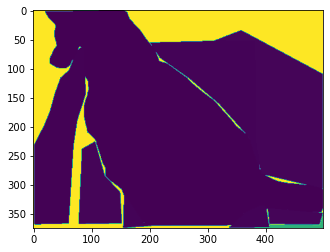

In [11]:
img = Image.open('datasets/coco_stuff/train_inst/000000017914.png')
plt.imshow(img)

In [13]:
trans = torchvision.transforms.ToTensor()
img_tensor = trans(img)
img_tensor.shape


torch.Size([1, 375, 500])

In [14]:
def get_edges(t):
    edge = torch.ByteTensor(t.size()).zero_()
    # edge = edge.bool()
    edge[:, :, :, 1:] = edge[:, :, :, 1:] | (t[:, :, :, 1:] != t[:, :, :, :-1])
    edge[:, :, :, :-1] = edge[:, :, :, :-1] | (t[:, :, :, 1:] != t[:, :, :, :-1])
    edge[:, :, 1:, :] = edge[:, :, 1:, :] | (t[:, :, 1:, :] != t[:, :, :-1, :])
    edge[:, :, :-1, :] = edge[:, :, :-1, :] | (t[:, :, 1:, :] != t[:, :, :-1, :])
    return edge.float()

In [16]:
res = get_edges(img_tensor.unsqueeze(0))
res = res.squeeze()
res.shape

torch.Size([375, 500])

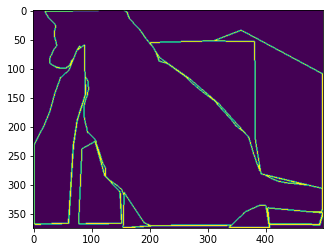

In [17]:
plt.imshow(res)

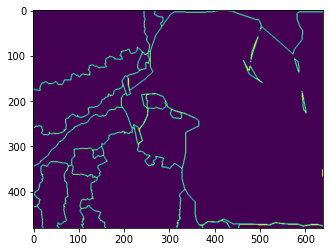

In [18]:
# summary

img = Image.open('/home/wangph/SPADE/datasets/coco_stuff/train_label/000000029286.png')
trans = torchvision.transforms.ToTensor()
img_tensor = trans(img)
res = get_edges(img_tensor.unsqueeze(0))
res = res.squeeze()
plt.imshow(res)